# Now it's time for some real-world data to test this model on!
Of course, putting a model through this is useless if we can't find some real-world data to apply it to. So I've decided to take a look at some real world data, fit the model, and see how it fares. Unfortunately, I couldn't find any great simple regression datasets that would work well for this example without a bunch of engineering, and although I might do some examples with data like that in the future, [this pre-splitted kaggle set](https://www.kaggle.com/alphaepsilon/housing-prices-dataset/download) seemed pretty optimal to do this job.

In [1]:
using CSV
df = CSV.read("train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour
,Int64,Int64,String,String,Int64,String,String,String,String
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl
7,7,20,RL,75,10084,Pave,NA,Reg,Lvl
8,8,60,RL,NA,10382,Pave,NA,IR1,Lvl
9,9,50,RM,51,6120,Pave,NA,Reg,Lvl


In [2]:
testdf = CSV.read("train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour
,Int64,Int64,String,String,Int64,String,String,String,String
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl
7,7,20,RL,75,10084,Pave,NA,Reg,Lvl
8,8,60,RL,NA,10382,Pave,NA,IR1,Lvl
9,9,50,RM,51,6120,Pave,NA,Reg,Lvl


In [3]:
# Firstly let's get a better look at what we got goin
#     on here.
using DataFrames
show(df,allcols=true)

1460×81 DataFrame
│ Row  │ Id    │ MSSubClass │ MSZoning │ LotFrontage │ LotArea │ Street │
│      │ Int64 │ Int64      │ String   │ String      │ Int64   │ String │
├──────┼───────┼────────────┼──────────┼─────────────┼─────────┼────────┤
│ 1    │ 1     │ 60         │ RL       │ 65          │ 8450    │ Pave   │
│ 2    │ 2     │ 20         │ RL       │ 80          │ 9600    │ Pave   │
│ 3    │ 3     │ 60         │ RL       │ 68          │ 11250   │ Pave   │
│ 4    │ 4     │ 70         │ RL       │ 60          │ 9550    │ Pave   │
│ 5    │ 5     │ 60         │ RL       │ 84          │ 14260   │ Pave   │
│ 6    │ 6     │ 50         │ RL       │ 85          │ 14115   │ Pave   │
│ 7    │ 7     │ 20         │ RL       │ 75          │ 10084   │ Pave   │
│ 8    │ 8     │ 60         │ RL       │ NA          │ 10382   │ Pave   │
│ 9    │ 9     │ 50         │ RM       │ 51          │ 6120    │ Pave   │
│ 10   │ 10    │ 190        │ RL       │ 50          │ 7420    │ Pave   │
⋮
│ 1450 │ 1450  │ 1

│ 9    │ CompShg  │ BrkFace     │ Wd Shng     │ None       │ 0          │
│ 10   │ CompShg  │ MetalSd     │ MetalSd     │ None       │ 0          │
⋮
│ 1450 │ CompShg  │ CemntBd     │ CmentBd     │ None       │ 0          │
│ 1451 │ CompShg  │ VinylSd     │ VinylSd     │ None       │ 0          │
│ 1452 │ CompShg  │ CemntBd     │ CmentBd     │ Stone      │ 194        │
│ 1453 │ CompShg  │ VinylSd     │ VinylSd     │ BrkFace    │ 80         │
│ 1454 │ CompShg  │ VinylSd     │ VinylSd     │ None       │ 0          │
│ 1455 │ CompShg  │ VinylSd     │ VinylSd     │ None       │ 0          │
│ 1456 │ CompShg  │ VinylSd     │ VinylSd     │ None       │ 0          │
│ 1457 │ CompShg  │ Plywood     │ Plywood     │ Stone      │ 119        │
│ 1458 │ CompShg  │ CemntBd     │ CmentBd     │ None       │ 0          │
│ 1459 │ CompShg  │ MetalSd     │ MetalSd     │ None       │ 0          │
│ 1460 │ CompShg  │ HdBoard     │ HdBoard     │ None       │ 0          │

│ Row  │ ExterQual │ ExterCond │ Fo

│      │ Int64        │ Int64        │ Int64    │ Int64    │ Int64        │
├──────┼──────────────┼──────────────┼──────────┼──────────┼──────────────┤
│ 1    │ 1            │ 0            │ 2        │ 1        │ 3            │
│ 2    │ 0            │ 1            │ 2        │ 0        │ 3            │
│ 3    │ 1            │ 0            │ 2        │ 1        │ 3            │
│ 4    │ 1            │ 0            │ 1        │ 0        │ 3            │
│ 5    │ 1            │ 0            │ 2        │ 1        │ 4            │
│ 6    │ 1            │ 0            │ 1        │ 1        │ 1            │
│ 7    │ 1            │ 0            │ 2        │ 0        │ 3            │
│ 8    │ 1            │ 0            │ 2        │ 1        │ 3            │
│ 9    │ 0            │ 0            │ 2        │ 0        │ 2            │
│ 10   │ 1            │ 0            │ 1        │ 0        │ 2            │
⋮
│ 1450 │ 1            │ 0            │ 1        │ 0        │ 1            │
│ 1451 │ 0

In [4]:
# Of course, since this is single-feature linear regression,
#     We only need 2 features, an x and a target.
using DataFrames
df = DataFrame(:LotArea => df.LotArea, :SalePrice => df.SalePrice, 
    :YearBuilt => df.YearBuilt,:YearSold => df.YrSold, :Rooms => df.TotRmsAbvGrd)

,LotArea,SalePrice,YearBuilt,YearSold,Rooms
,Int64,Int64,Int64,Int64,Int64
1,8450,208500,2003,2008,8
2,9600,181500,1976,2007,6
3,11250,223500,2001,2008,6
4,9550,140000,1915,2006,7
5,14260,250000,2000,2008,9
6,14115,143000,1993,2009,5
7,10084,307000,2004,2007,7
8,10382,200000,1973,2009,7
9,6120,129900,1931,2008,8


In [5]:
using Lathe: stats
println(stats.mean(df.LotArea))
println(stats.mean(df.SalePrice))
println(stats.mean(df.YearBuilt))
println(stats.mean(df.Rooms))

10516.828082191782
180921.19589041095
1971.267808219178
6.517808219178082


In [6]:
# We have to do the same with the traindf of course, also:
testdf = DataFrame(:LotArea => testdf.LotArea, :SalePrice => testdf.SalePrice, 
    :YearBuilt => testdf.YearBuilt,:YearSold => testdf.YrSold, :Rooms => testdf.TotRmsAbvGrd)

,LotArea,SalePrice,YearBuilt,YearSold,Rooms
,Int64,Int64,Int64,Int64,Int64
1,8450,208500,2003,2008,8
2,9600,181500,1976,2007,6
3,11250,223500,2001,2008,6
4,9550,140000,1915,2006,7
5,14260,250000,2000,2008,9
6,14115,143000,1993,2009,5
7,10084,307000,2004,2007,7
8,10382,200000,1973,2009,7
9,6120,129900,1931,2008,8


In [7]:
# Of course, we need to find and destroy
#    Our null values!
function spot_missing(array)
    total = 0
    for i in array
        if i == "missing"
            total = total + 1
        end
    end
    return(total)
end

spot_missing (generic function with 1 method)

In [8]:
spot_missing(df.LotArea)

0

In [9]:
spot_missing(df.SalePrice)

0

In [10]:
spot_missing(df.YearBuilt)

0

In [11]:
spot_missing(df.YearSold)

0

In [12]:
spot_missing(df.Rooms)

0

# Quick ML!

In [13]:
using Lathe: validate

In [14]:
using Lathe: models
model = models.LinearRegression(df.LotArea,df.SalePrice)
testdf.linearreg = models.predict(model,testdf.LotArea)

1460-element Array{Any,1}:
   2732.632566151946 
   5147.600310615771 
   8612.554030933434 
   5042.60171303039  
  14933.469605573535 
  14628.973672575923 
   6163.986735242286 
   6789.7783768511745
  -2160.302081326936 
    569.6614558930414
   8507.555433348052 
  10027.93512638441  
  12220.305843967219 
      ⋮              
   9698.239529966302 
 -11792.873423810037 
   3887.617139591168 
   4437.809790938578 
  -7294.7335032522   
  21143.086666773124 
    737.6592120296555
   1613.3475158917554
  12655.000037970707 
   3975.8159615628883
   5393.29702896557  
   5855.290858341259 

In [15]:
linearacc = validate.mae(testdf.SalePrice,testdf.linearreg)

173848.28232265453

In [16]:
model = models.FourSquare(df.LotArea,df.SalePrice)

Lathe.models.FourSquare(Int64[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420  …  9000, 9262, 3675, 17217, 7500, 7917, 13175, 9042, 9717, 9937], Int64[208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000  …  136000, 287090, 145000, 84500, 185000, 175000, 210000, 266500, 142125, 147500])

In [17]:
testdf.foursqu = models.predict(model,testdf.LotArea)

1460-element Array{Any,1}:
  63877.10502378396
  65761.60308603423
  65910.65942994104
  66283.30028970803
  66357.82846166144
  66357.82846166144
  67028.58200924203
  67922.92007268284
  67922.92007268284
  67922.92007268284
  67922.92007268284
  67922.92007268284
  67922.92007268284
      ⋮            
 135535.8309890374 
 151244.99021406195
 163344.71198542794
 163856.68892920928
 165038.5023744379 
 180807.39224290362
 209337.30743511952
 238665.0533647281 
 428045.3248694508 
 615134.4995507521 
 639282.7453991058 
 855102.3595756041 

In [18]:
foursqacc = validate.mae(testdf.SalePrice,testdf.foursqu)

104892.39723066095

# Visualizations

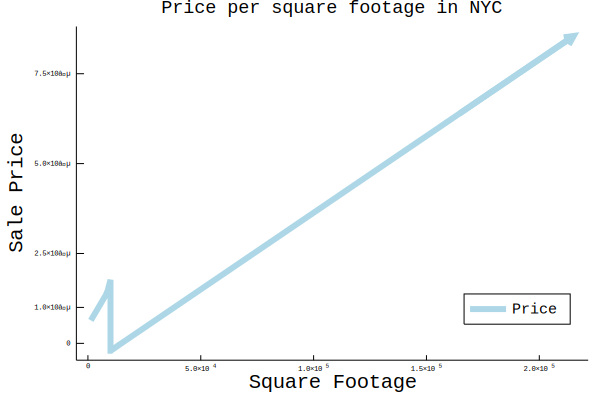

In [19]:
using Plots
plot(testdf.LotArea,testdf.foursqu,arrow = true,
    linewidth = 6,
    color = :lightblue,
    yticks=([0,250000,500000,750000,100000]),
    grid = false,legend=:bottomright,label="Price",
    title = "Price per square footage in NYC",
    xlabel = "Square Footage", ylabel = "Sale Price",
    fontfamily = :Courier,xtickfontsize=4,ytickfontsize=4,
    ytickfont=:Courier,xtickfont = :Courier,titlefontsize=10
    )

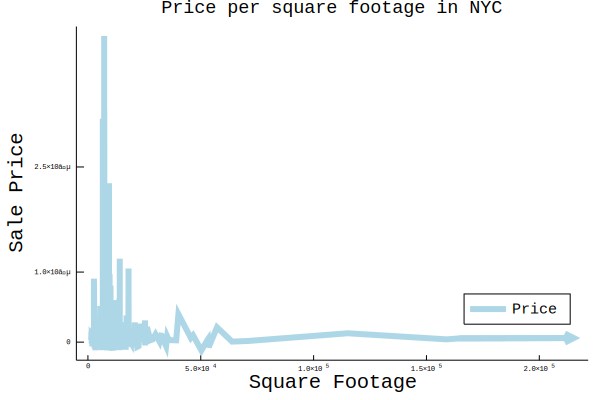

In [20]:
plot(testdf.LotArea,testdf.linearreg,arrow = true,
    linewidth = 6,
    color = :lightblue,
    yticks=([0,250000,500000,750000,100000]),
    grid = false,legend=:bottomright,label="Price",
    title = "Price per square footage in NYC",
    xlabel = "Square Footage", ylabel = "Sale Price",
    fontfamily = :Courier,xtickfontsize=4,ytickfontsize=4,
    ytickfont=:Courier,xtickfont = :Courier,titlefontsize=10)